***Can We Predict Gaming Duration?***

**Introduction**

This project is based on the data of collected by researchers at the Pacific Laboratory for Artificial Intelligence (PLAI) who set up a private server for Minecraft. Players who join the server have their actions recorded. The goal of PLAI is to create an embodied AI that can be interacted with like a real person in virtual worlds (e.g., Minecraft). Check out more [here](https://plaicraft.ai/).

We will be using the same dataset, but with a different goal. The goal of this project will be to study how different features in the dataset contribute to gaming time. 

*More specifically, how do player experience level and age influence the total amount played?*

Before we get into it, let's take a look at the data we will be using. 

In [2]:
library(dplyr)
library(ggplot2)
library(readr)

sessions = read_csv("Data/sessions.csv")
head(sessions)
summary(sessions)
str(sessions)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

spc_tbl_ [1,535 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ hashedEmail        : chr [1:1535] "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" "36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686" "f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc" "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" ...
 $ start_time         : chr [1:1535] "30/06/2024 18:12" "17/06/2024 23:33" "25/07/2024 17:34" "25/07/2024 03:22" ...
 $ end_time           : chr [1:1535] "30/06/2024 18:24" "17/06/2024 23:46" "25/07/2024 17:57" "25/07/2024 03:58" ...
 $ original_start_time: num [1:1535] 1.72e+12 1.72e+12 1.72e+12 1.72e+12 1.72e+12 ...
 $ original_end_time  : num [1:1535] 1.72e+12 1.72e+12 1.72e+12 1.72e+12 1.72e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   hashedEmail = col_character(),
  ..   start_time = col_character(),
  ..   end_time = col_character(),
  ..   original_start_time = col_double(),
  ..   original_end_time = col_double()


- **Number of observations:**
    - 1535 observations
- **Number of variables:**
    - 5 variables
- **name and type of variables:**
                                                                    
| Name                | Type |
|---------------------|------|
| hashedEmail         | chr  |
| start_time          | chr  |
| end_time            | chr  |
| original_start_time | num  |
| original_end_time   | num  | 

- **What do the variables mean?:**
    - hashedEmail:
        - *these are the emails of users converted into unreadable strings*
    - start_time:
        - *Start time of a session in a human-readable format*
    - end_time:
        - *End time of a session in a human-readable format*
    - original_start_time:
        - *Start time in a format easier for computers*
    - original_end_time:
        - *End time in a format easier for computers*

In [3]:
players = read_csv("Data/players.csv")
head(players)
summary(players)
str(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age        individualId  
 Length:196         Length:196         Min.   : 8.00   Mode:logical  
 Class :character   Class :character   1st Qu.:17.00   NA's:196      
 Mode  :character   Mode  :character   Median :19.00                 
                                       Mean   :21.28                 
                                       3rd Qu.:22.00                 
                                       Max.   :99.00                 

spc_tbl_ [196 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ experience      : chr [1:196] "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe       : logi [1:196] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail     : chr [1:196] "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours    : num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name            : chr [1:196] "Morgan" "Christian" "Blake" "Flora" ...
 $ gender          : chr [1:196] "Male" "Male" "Male" "Female" ...
 $ age             : num [1:196] 9 17 17 21 21 17 19 21 17 22 ...
 $ individualId    : logi [1:196] NA NA NA NA NA NA ...
 $ organizationName: logi [1:196] NA NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   experience = col_character(),
  ..   subscribe = col_logical(),
  .. 

- **Number of observations:**
    - 196 observations
- **Number of variables:**
    - 9 variables
- **name and type of variables:**
                                                                    
| Name             | Type |
|------------------|------|
| experience       | chr  |
| subscribe        | logi |
| hashedEmail      | chr  |
| played_hours     | num  |
| name             | chr  | 
| gender           | chr  |
| age              | num  |
| individualId     | logi |
| organizationName | logi |

- **What do the variables mean?:**
    - experience:
        - *What level players are at (pro, veteran, amateur, regular)*
    - subscribe:
        - *Whether or not the player has a subscription*
    - hashedEmail:
        - *Hashed version of player's email*
    - played_hours:
        - *How many hours a player has played*
    - name:
        - *Name of the player*
    - gender:
        - *Gender of the player*
    - age:
        - *Age of the player*
    - individualId:
        - *ID for player*
    - organizationName:
        - *Organization player is associated with*

To do so, the two datasets need to be merged and organized based on matching hashed emails. Then filter the data by experience level (veteran and up) and age (under 20). For non-numerical values, they will need to be encoded for the computer to read.

Since, one player may have multiple start and end times, we will first use played_hours variable from players.csv as the response variable first. 

In [11]:
filtered_players <- players |>
filter(played_hours > 0 & played_hours <= 25)

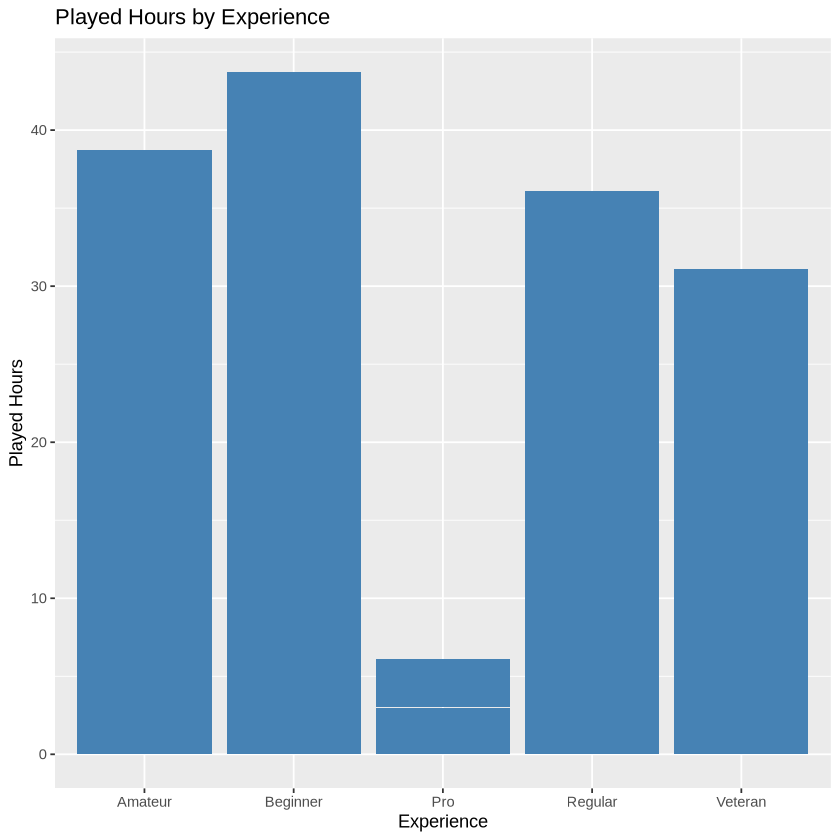

In [12]:
ggplot(filtered_players, aes(x = experience, y = played_hours)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(title = "Played Hours by Experience", x = "Experience", y = "Played Hours")

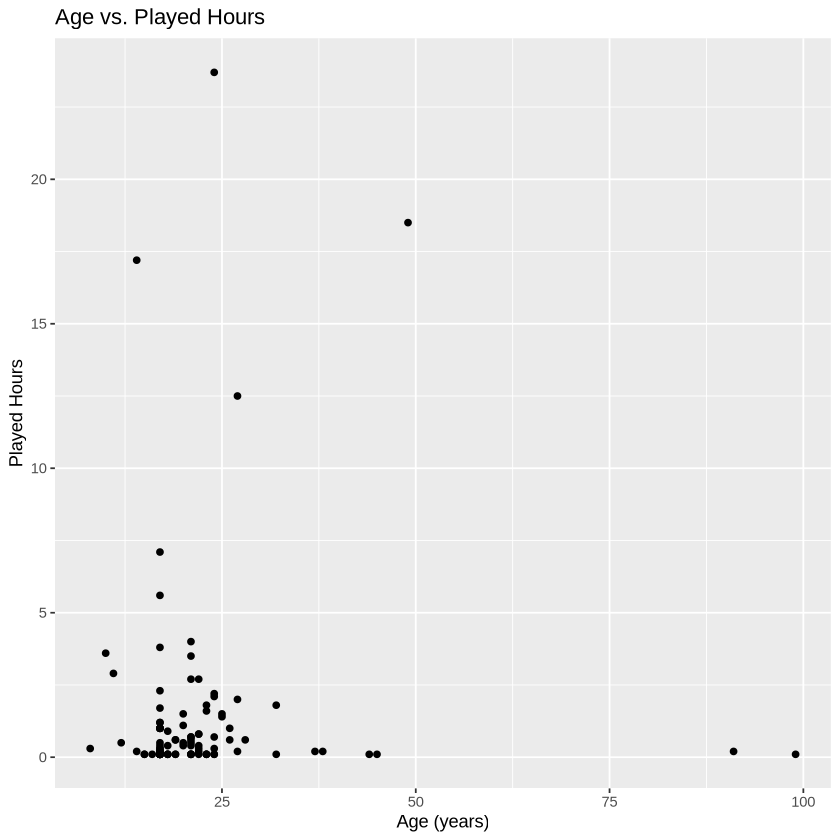

In [13]:
ggplot(filtered_players, aes(x = age, y = played_hours)) +
    geom_point() +
    labs(title = "Age vs. Played Hours", x = "Age (years)", y = "Played Hours")

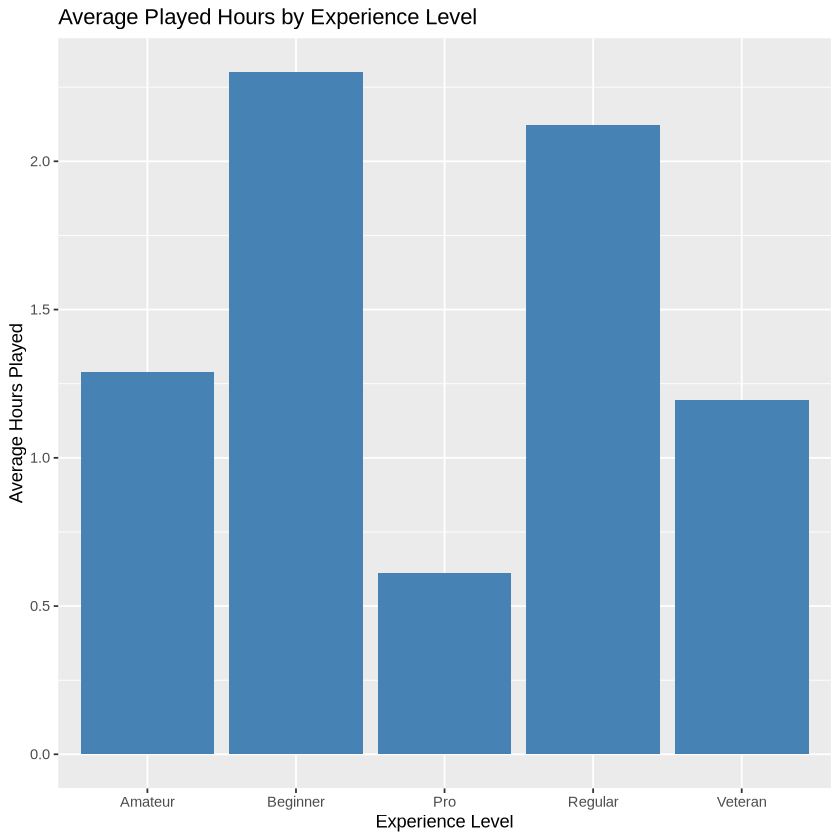

In [14]:
avg_playtime <- filtered_players |>
    group_by(experience) |>
    summarize(avg_played_hours = mean(played_hours))

ggplot(avg_playtime, aes(x = experience, y = avg_played_hours)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(title = "Average Played Hours by Experience Level", x = "Experience Level", y = "Average Hours Played")

As the initial plotting of the data does not show any linear relationship between experience level and age with hours played, a more appropriate method to address my question would be KNN regression. This method is relevant because it doesn't assume linearity, making it more suitable for non-linear patterns. I must select the right k to balance the small details carefully but not be too noisy. I will compare this method against other methods, such as multivariable linear regression, to select the best approach. To process the data, I will filter out the players with more than 25 hours of playtime or use the log scale to reduce the impact of outliers. With age, I will filter out players older than 50 as there are few players above that age, making the graphs more readable. I will perform an 80/20 split on the dataset and use 5-fold cross-validation. I will not use a validation data set as that will reduce the amount of training data that is already scarce, as there are only 197 observations.